In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf

analysis of data in the range of dates -

In [3]:
starting_date =  datetime.datetime(2022, 9, 1)

In [4]:
ending_date = datetime.datetime(2023,9,1)

In [5]:
amazon = yf.download('AMZN', starting_date,ending_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-01,126.000000,128.020004,123.660004,127.820000,127.820000,56636100
2022-09-02,129.500000,131.380005,126.389999,127.510002,127.510002,57429800
2022-09-06,127.919998,128.619995,124.739998,126.110001,126.110001,43888600
2022-09-07,126.120003,129.820007,125.400002,129.479996,129.479996,47900300
2022-09-08,127.720001,130.279999,127.099998,129.820007,129.820007,43988500



performing data cleaning (handling missing files)

In [7]:
amazon.dropna(inplace=True)

Change in stock price over time

In [8]:
amazon['Price Change'] = amazon['Adj Close'].diff()

In [9]:
amazon.head()

,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,
2022-09-01,126.000000,128.020004,123.660004,127.820000,127.820000,56636100,NaN
2022-09-02,129.500000,131.380005,126.389999,127.510002,127.510002,57429800,-0.309998
2022-09-06,127.919998,128.619995,124.739998,126.110001,126.110001,43888600,-1.400002
2022-09-07,126.120003,129.820007,125.400002,129.479996,129.479996,47900300,3.369995
2022-09-08,127.720001,130.279999,127.099998,129.820007,129.820007,43988500,0.340012


Visualizing the change in a stock’s volume being traded, over time

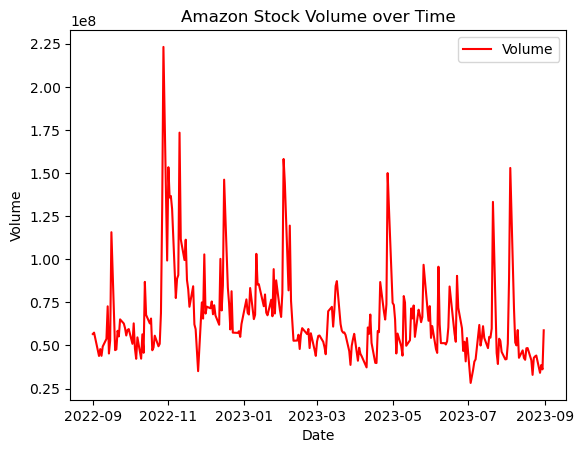

In [18]:
plt.plot(amazon.index,amazon['Volume'], label ='Volume',color='red')
plt.title('Amazon Stock Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [33]:
apple = yf.download("AAPL", start=starting_date, end=ending_date)
google = yf.download("GOOGL", start=starting_date, end=ending_date)
microsoft = yf.download("MSFT", start=starting_date, end=ending_date)


apple.dropna(inplace=True)
google.dropna(inplace=True)
microsoft.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


The moving average of various stocks

In [34]:
amazon['200-Day Moving Average'] = amazon['Adj Close'].rolling(window=200).mean()
apple['200-Day Moving Average'] = apple['Adj Close'].rolling(window=200).mean()
google['200-Day Moving Average'] = google['Adj Close'].rolling(window=200).mean()
microsoft['200-Day Moving Average'] = amazon['Adj Close'].rolling(window=200).mean()

In [35]:
print("moving average of amazon -\n", amazon['200-Day Moving Average'],"\n")
print("moving average of apple -\n", apple['200-Day Moving Average'],"\n")
print("moving average of google -\n", google['200-Day Moving Average'],"\n")
print("moving average of microsoft -\n", microsoft['200-Day Moving Average'],"\n")

moving average of amazon -
 Date
2022-09-01          NaN
2022-09-02          NaN
2022-09-06          NaN
2022-09-07          NaN
2022-09-08          NaN
                ...    
2023-08-25    108.10960
2023-08-28    108.32540
2023-08-29    108.56925
2023-08-30    108.76145
2023-08-31    108.94755
Name: 200-Day Moving Average, Length: 251, dtype: float64 

moving average of apple -
 Date
2022-09-01           NaN
2022-09-02           NaN
2022-09-06           NaN
2022-09-07           NaN
2022-09-08           NaN
                 ...    
2023-08-25    161.950502
2023-08-28    162.156915
2023-08-29    162.406030
2023-08-30    162.613049
2023-08-31    162.807079
Name: 200-Day Moving Average, Length: 251, dtype: float64 

moving average of google -
 Date
2022-09-01          NaN
2022-09-02          NaN
2022-09-06          NaN
2022-09-07          NaN
2022-09-08          NaN
                ...    
2023-08-25    107.42670
2023-08-28    107.63725
2023-08-29    107.87350
2023-08-30    108.08320
202

daily return average of a stock (say amazon)-

In [38]:
amazon['Daily Return'] = amazon['Adj Close'].pct_change()
average =amazon['Daily Return'].mean()
print(average)

0.0006119620637783689


Adding a new column ‘Trend’ whose values are based on the 'Daily Return'.

In [39]:

for stock in [amazon, apple, google, microsoft]:
    stock["Daily Return"] = stock["Adj Close"].pct_change()
    stock["Trend"] = ["Up" if x > 0 else "Down" for x in stock["Daily Return"]]

finding trend frequencies and storing them in a dictionary

In [41]:
trend_frequencies = {
    "Amazon": amazon["Trend"].value_counts(),
    "Apple": apple["Trend"].value_counts(),
    "Google": google["Trend"].value_counts(),
    "Microsoft": microsoft["Trend"].value_counts(),
}

print(trend_frequencies)

{'Amazon': Up      126
Down    125
Name: Trend, dtype: int64, 'Apple': Up      131
Down    120
Name: Trend, dtype: int64, 'Google': Up      126
Down    125
Name: Trend, dtype: int64, 'Microsoft': Down    126
Up      125
Name: Trend, dtype: int64}


pie chart to visualize trend frequencies

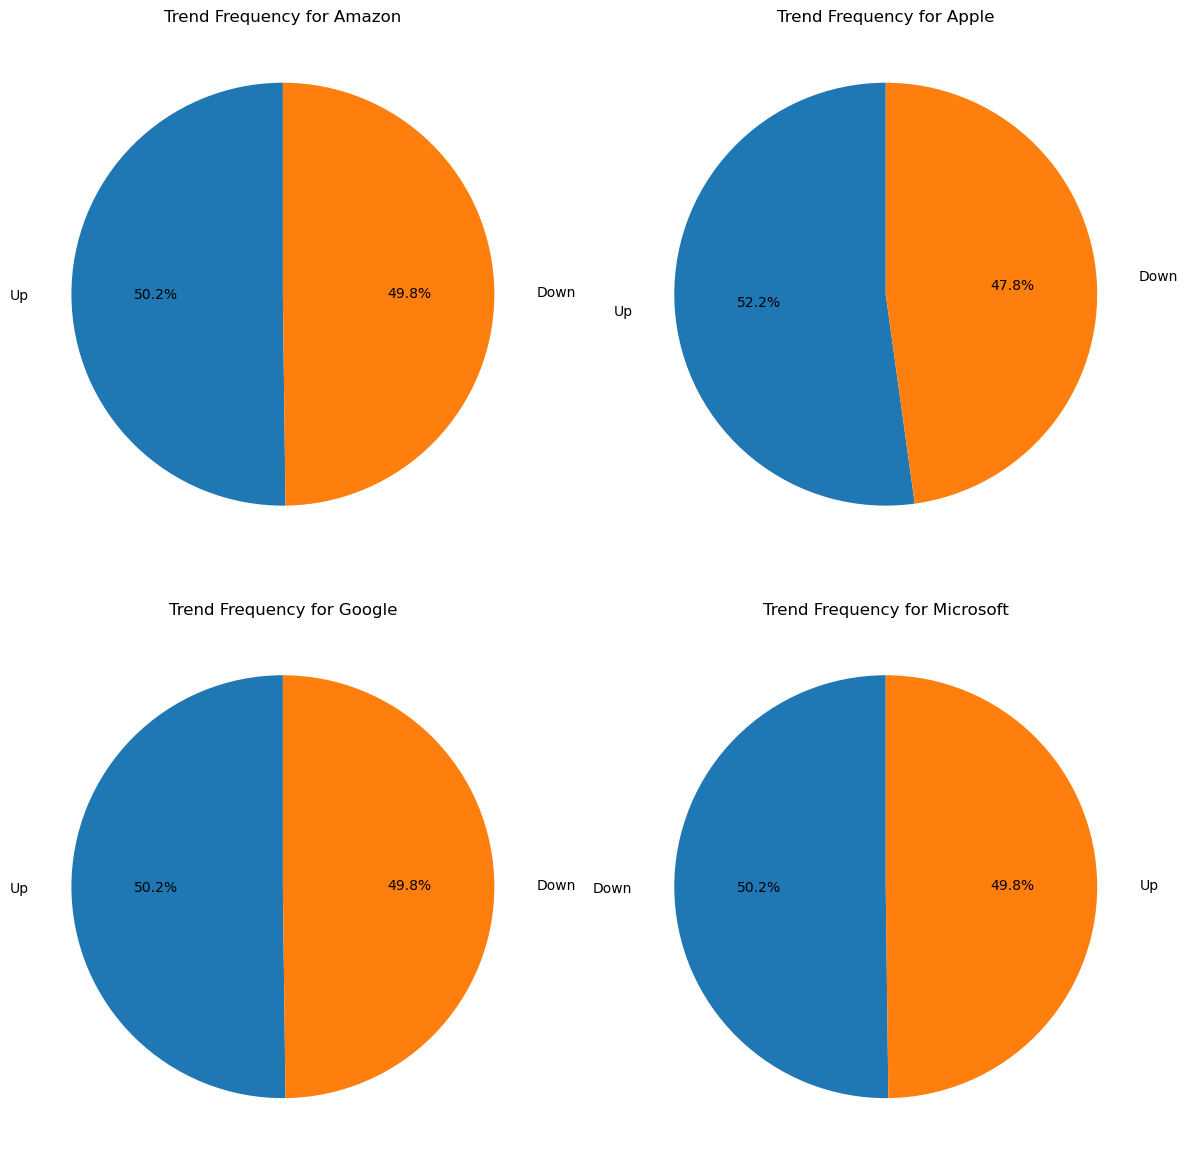

In [44]:
plt.figure(figsize=(12, 12))

num_rows = 2
num_cols = 2

for i, (stock, trend_count) in enumerate(trend_frequencies.items(), 1):
    plt.subplot(num_rows, num_cols, i)
    plt.pie(trend_count, labels=trend_count.index, autopct='%1.1f%%', startangle=90, labeldistance=1.2)
    plt.title(f"Trend Frequency for {stock}")

plt.tight_layout()
plt.show()

The correlation between the daily returns of different stocks

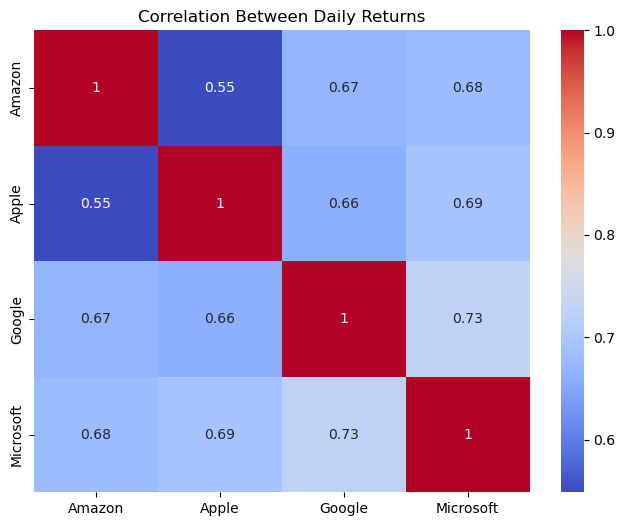

In [50]:
all_stocks = pd.concat([amazon['Daily Return'], apple['Daily Return'], google['Daily Return'], microsoft['Daily Return']], axis=1)
all_stocks.columns = ['Amazon', 'Apple', 'Google', 'Microsoft']

correlation_matrix = all_stocks.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True,  cmap='coolwarm')
plt.title('Correlation Between Daily Returns')
plt.show()

In [51]:
!pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [18 lines of output]
  The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
  rather than 'sklearn' for pip commands.
  
  Here is how to fix this error in the main use cases:
  - use 'pip install scikit-learn' rather than 'pip install sklearn'
  - replace 'sklearn' by 'scikit-learn' in your pip requirements files
    (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
  - if the 'sklearn' package is used by one of your dependencies,
    it would be great if you take some time to track which package uses
    'sklearn' instead of 'scikit-learn' and report it to their issue tracker
  - as a last resort, set the environment variable
    SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
  
  More information is available at
  https://github.com/scikit-learn/sklearn-pypi-package
  
  If the previous advice does not cover your use case, feel 